<a href="https://colab.research.google.com/github/manoelgeraldo/Imersao_Dados_Alura/blob/main/2%C2%AA_Imersao_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Análise dos Dados Referentes ao ENEM 2019**



Este documento contém a análise de dados referentes ao ENEM 2019 realizada na **2ª Edição do Imersão de Dados** promovida gratuitamente pela ***Alura*** (https://www.alura.com.br/), maior plataforma brasileira de cursos de tecnologia.



Autor: Manoel Geraldo

Linkedin (https://www.linkedin.com/in/manoel-geraldo-430a661b8)

GitHub (https://github.com/manoelgeraldo)

*Obs: Ainda preciso organizar meu perfil nas plataformas para compartilhar alguns projetos que já desenvolvo, mas caso queria entrar em contato fique a vontade.

# **01 Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# **02 Carregando os Dados**

In [2]:
# Url onde se encontram os dados
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

# Carregando os dados em DataFrame
dados = pd.read_csv(fonte)

# Mostrando apenas os 03 primeiros registros
dados.head(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


# **03 Resumo dos Dados**

In [3]:
# Mostrando quantas Linhas e Colunas possuem o arquivo
dados.shape

(127380, 136)

In [4]:
# Mostrando os tipos de dados nas colunas e o tamanho do arquivo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


In [5]:
# Mostrando os titulos das colunas
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **04 Desafio da Imersão de Dados do Alura**



## *Desafio01: Proporção dos inscritos por idade*

In [6]:
# Resumo Geral
dados['NU_IDADE'].describe()

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

1. ***22 anos*** é a Idade Média dos Participantes
2. A Menor Idade de participantes Inscritos é ***13 anos*** e a Maior é **82 anos**



In [7]:
# Ordenando as Idades da Maior Quantidade Ocorrência para o Menor
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

3. A maior quantidade de inscritos possuem **18 anos**
4. A faixa de idade que concentra maior inscritos está entre **17 e 20 anos**

In [8]:
# Ordenando as Idades da Menor Idade para a Maior
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

5. A idade dos participantes variam dos 13 aos 82 anos

In [9]:
# Mostrando a Porcentagem de Ocorrência das Idades Relativas ao Total da Amostra
dados['NU_IDADE'].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

6. Cerca de ***44,8%*** dos participantes possuem idades entre ***17 e 19 anos***.

In [10]:
# Mostrando as faixas etarias dos participantes
def faixa_etaria(s):
    if s >= 60:
       return 'Acima de 60 anos'
    elif s >= 30:
       return '30 aos 59 anos'
    elif s >= 25:
       return '25 aos 29 anos'
    elif s >= 18:
       return '18 aos 24 anos'
    elif s >= 13:
       return '13 aos 17 anos'
dados['faixa_etaria']=dados['NU_IDADE'].apply(faixa_etaria)
print('Faixa Etária dos Inscritos')
dados['faixa_etaria'].value_counts().sort_index()

Faixa Etária dos Inscritos


13 aos 17 anos      31240
18 aos 24 anos      67980
25 aos 29 anos      11646
30 aos 59 anos      16213
Acima de 60 anos      301
Name: faixa_etaria, dtype: int64

7. A faixa etária dos ***18 aos 24 anos*** concentra o maior número de participantes

## *Desafio02: Descobrir de quais estados são os inscritos com 13 anos*

In [11]:
# Registros do Participantes com Idade de 13 anos
dados.loc[dados['NU_IDADE']==13]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,faixa_etaria
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B,13 aos 17 anos
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,13 aos 17 anos
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B,13 aos 17 anos
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B,13 aos 17 anos


In [12]:
# Estado dos Participantes com Idade de 13 anos
dados.loc[dados['NU_IDADE']==13].value_counts(dados['SG_UF_PROVA'])

SG_UF_PROVA
SP    1
MT    1
BA    1
AP    1
dtype: int64

8. São Paulo, Mato Grosso, Bahia e Amapá regitram participantes com 13 anos

## *Desafio03: Adicionar título no gráfico*

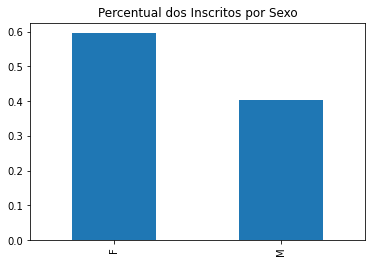

In [13]:
dados['TP_SEXO'].value_counts(normalize=True).plot(kind='bar', title='Percentual dos Inscritos por Sexo')

## *Desafio04: Plotar os Histogramas das idades dos treineiros e não treineiros*

In [14]:
# Mostrando os numeros Percentuais dos participantes que realizaram a prova como Treineiros
dados['IN_TREINEIRO'].value_counts(normalize=True)

0    0.879094
1    0.120906
Name: IN_TREINEIRO, dtype: float64

9. 12% dos participantes são treineiros

In [15]:
# Quantidade por Idades dos Treineiros
dados.loc[dados['IN_TREINEIRO']==1].value_counts(dados['NU_IDADE'])

NU_IDADE
16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
42       4
40       4
38       4
31       4
30       4
34       3
32       2
35       2
36       2
39       2
44       2
46       2
55       1
33       1
37       1
41       1
45       1
47       1
48       1
51       1
62       1
dtype: int64

In [16]:
# Quantidade por Idades dos Não-Treineiros
dados.loc[dados['IN_TREINEIRO']==0].value_counts(dados['NU_IDADE'])

NU_IDADE
18    20594
17    16355
19    14190
20    10330
21     7223
      ...  
73        2
75        2
77        1
76        1
82        1
Length: 65, dtype: int64

Text(0.5, 1.0, 'Histograma das Idades dos Treineiros e Não-Treineiros')

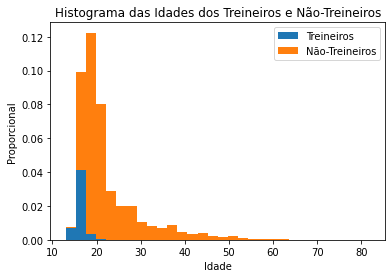

In [17]:
# váriavel que recebe as informações
treineiros = dados.query('IN_TREINEIRO==1')['NU_IDADE']
nao_treineiros = dados.query('IN_TREINEIRO==0')['NU_IDADE']

# Identificação dos Dados no gráfico
titulos=['Treineiros','Não-Treineiros']

# Criação do histograma
plt.hist([treineiros, nao_treineiros], bins=30, label= titulos, histtype='barstacked', density=True)

# Nomeia as Linhas
plt.xlabel('Idade')
plt.ylabel('Proporcional')
plt.legend()

# Mostra o titulo do grafico
plt.title('Histograma das Idades dos Treineiros e Não-Treineiros')

## Desafio05: Comparar as distribuições das provas em inglês espanhol

In [18]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [19]:
dados['TP_LINGUA'].value_counts(normalize=True)

1    0.524486
0    0.475514
Name: TP_LINGUA, dtype: float64

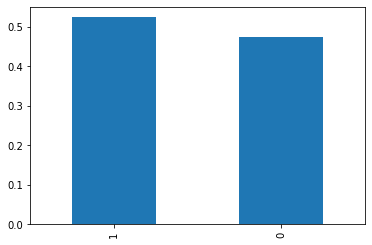

In [20]:
dados['TP_LINGUA'].value_counts(normalize=True).plot(kind='bar')


## Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações

Faixa Etária dos Inscritos


Text(0.5, 1.0, 'Porcentagem por Faixa Etária')

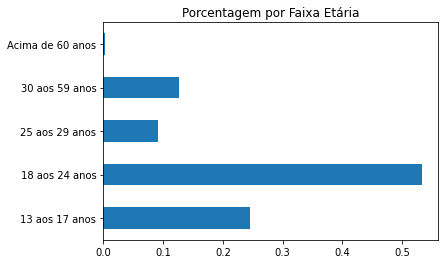

In [21]:
# Mostrando as faixas etarias dos participantes
def faixa_etaria(s):
    if s >= 60:
       return 'Acima de 60 anos'
    elif s >= 30:
       return '30 aos 59 anos'
    elif s >= 25:
       return '25 aos 29 anos'
    elif s >= 18:
       return '18 aos 24 anos'
    elif s >= 13:
       return '13 aos 17 anos'
dados['faixa_etaria']=dados['NU_IDADE'].apply(faixa_etaria)
print('Faixa Etária dos Inscritos')
dados['faixa_etaria'].value_counts(normalize=True).sort_index().plot(kind='barh')

plt.title('Porcentagem por Faixa Etária')